<a href="https://colab.research.google.com/github/octavianosilva/data_science/blob/main/Classificando_Gatos_e_Cachorros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificando Imagens de Gatos e Cachorros com Machine Learning

Com o avanço rápido da tecnologia temos modelos de Machine Learning cada vez mais capazes de interpretar nosso mundo, tarefas como reconhecimento facial, de objetos ou de seres vivos já não são exclusivas daqueles que habitam o mundo físico.

A área de Visão Computacional vem se destacando cada vez mais em todo o mundo, desde sua aplicação em carros autônomos a detecção de doenças através de imagens de exames.

<center><img alt="Carros Autônomos"  src='https://www.researchgate.net/publication/261200495/figure/fig3/AS:667810493644813@1536229837511/Typical-detection-results-of-our-on-board-pedestrian-detection-system-With-a.png'></center>

No caso dos carros autônomos, identificar um objeto ou pessoa nas proximidades do veículo é extremamente importante para evitar um acidente e adotar uma direção defensiva. 

<center><img alt="IA prevendo doenças em Tomografias"  src='https://medicinasa.com.br/ia-avc/ia-ufpr/'></center>

Já as imagens de exames, por exemplo Exames de Tomografia, um modelo é capaz de prever potenciais complicações de saúde apenas analisando as imagens do exame sem a necessidade de exames mais complexos.

As máquinas já são extremamente mais rápidas e precisas que os seres humanos em diversa tarefas computacionais, e trazer esse aspecto para o mundo físico pode melhorar muito a qualidade de vida dos seres vivos em praticamente todos os sentidos.

Para demonstrar que uma máquina é capaz de lidar com o mundo físico de maneira eficiente, iremos desenvolver um modelo supervisionado de Redes Neurais para classificar imagens entre cães e gatos e validar se esse modelo foi realmente capaz de identificar as características desses animais.

Os destaques do projeto serão as técnicas de Aumento de Dados (Data Augmentation) e Transferência de Aprendizado (Transfer Learning) apresentadas durante o desenvolvimento do modelo de redes neurais.

## Importando os dados e as bibliotecas

Os dados que serão importados neste projeto são de uma competição no Kaggle: [Dogs vs. Cats Redux: Kernels Edition](https://www.kaggle.com/competitions/dogs-vs-cats-redux-kernels-edition/overview).

Por ser uma base composta por imagens, os dados foram compactados (.zip) e segmentados de duas formas: uma com as imagens que serão utilizadas para treinar o modelo de Machine Learning e a outra com as imagens que serão utilizadas para testar a classificação do modelo.

In [ ]:
# Importando as bibliotecas
!pip install pyforest -q
import pyforest

!pip install tensorflow -q
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.metrics import classification_report
from IPython.display import display, Image

import os

Para baixar a base de dados é preciso obter o token de acesso da API do Kaggle (encontrada em seu perfil no Kaggle) que vem no formato `.json`.

Depois de importar o arquivo com o token no diretório do projeto, basta acessá-la:

In [ ]:
# Acessando a API do Kaggle para realizar o download da base de dados
os.environ['KAGGLE_USERNAME'] = ''
os.environ['KAGGLE_KEY'] = ''

# Realizando o download
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

100% 814M/814M [00:07<00:00, 122MB/s]
100% 814M/814M [00:07<00:00, 107MB/s]


In [ ]:
# Descompactando a pasta com os dados
!unzip -qq dogs-vs-cats-redux-kernels-edition.zip
# Descompactando a base de treino
!unzip -qq train.zip

# Descompactando a base de teste
!unzip -qq test.zip

Depois que os arquivos são decompactados é interessante criar um diretório para cada classe (gatos e cães) dentro do repositório de treino, para facilitar na identificação das imagens:

In [ ]:
# Criando diretórios de gatos e cachorros em cada base de dados
!mkdir train/cat # base com imagens de gatos
!mkdir train/dog # base com imagens de cães

Agora que os diretórios das classes foram criados, é preciso guardar os caminhos onde estão localizadas as imagens:

In [ ]:
# Salvando o caminho para os diretórios das imagens de treino e teste
dir_treino = os.path.join(os.getcwd(), 'train')
dir_teste = os.path.join(os.getcwd(), 'test')

A partir dos caminhos especificados acima é possível criar uma função para mover as imagens de gatos e cachorros para os devidos diretórios criados.

Como as imagens da base de dados de treino são nomeadas com a mesma estrutura (`animal.número.jpg`), pode-se extrair a classe (gato ou cão) dessa estrutura e mover as imagens para seus respectivos diretórios.

Já as imagens da base de dados de teste não possuem o rótulo identificando a classe (`número.jpg`), uma vez que essa base será usada justamente para prever esses rótulos, portanto as imagens serão mantidas no mesmo diretório.

Dito isso, será criada a função para mover as imagens de gatos ou cães para seus respectivos diretórios dentro da pasta de treinamento: 

In [ ]:
# Criando uma função para mover as imagens de treino para suas devidas pastas de classificação
def mover_imagens(diretorio):

  # Gerando uma lista com as imagens dentro do diretório
  lista_imagens = os.listdir(diretorio)

  for imagem in lista_imagens:
    
    # Realizando a separação dos nomes das imagens (Ex: gato.125.jpg)
    segmentos_imagem = imagem.split('.')
    
    if len(segmentos_imagem)>1:
      # Atribuindo um novo nome apenas com o número da imagem (Ex: 'gato.125.jpg' será '125.jpg')
      novo_nome = str(segmentos_imagem[1]) + '.' + segmentos_imagem[2]
    
      # Se o primeiro segmento do nome da imagem for cat (gato), enviar imagem para a pasta '/cats' e renomear a imagem
      if segmentos_imagem[0] == 'cat':
        origem = os.path.join(dir_treino, imagem)
        destino = os.path.join(dir_treino, 'cat', novo_nome)
        os.rename(origem, destino)

      # Se o primeiro segmento do nome da imagem for dog (cachorro), enviar imagem para a pasta '/dogs' e renomear a imagem    
      if segmentos_imagem[0] == 'dog':
        origem = os.path.join(dir_treino, imagem)
        destino = os.path.join(dir_treino, 'dog', novo_nome)
        os.rename(origem, destino)

Executando a função criada para enviar as imagens para seus respectivos diretórios:

In [ ]:
# Movendo as imagens de treino
mover_imagens(dir_treino)

In [ ]:
# Observando a quantidade de imagens de gatos e cachorros que serão utilizadas para treinar o modelo
qtde_gatos = len(os.listdir(os.path.join(dir_treino, 'cat')))
qtde_cachorros = len(os.listdir(os.path.join(dir_treino, 'dog')))

# Exibindo a quantidade de cada classe
print('Quantidade de imagens de gatos para o treinamento:', qtde_gatos)
print('Quantidade de imagens de cachorros para o treinamento:', qtde_cachorros)

Quantidade de imagens de gatos para o treinamento: 12500
Quantidade de imagens de cachorros para o treinamento: 12500


Visualizando as primeiras imagens dos diretórios de cachorros e gatos:

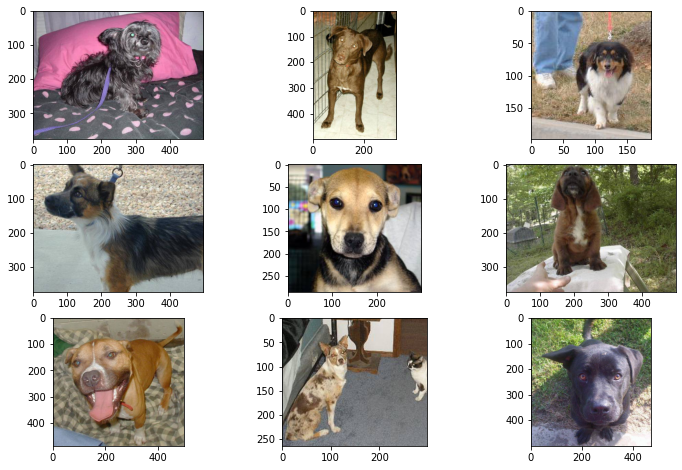

In [ ]:
# Visualizando algumas imagens da base de treino
folder = 'train/dog/'

plt.figure(figsize=(12,8))
# Plotando as 9 primeiras imagens da base
for i in range(9):
	plt.subplot(330 + 1 + i)
 
	# Definindo o nome do arquivo
	filename = folder + str(i) + '.jpg'
	image = imread(filename)
 
	# Plotando a imagem
	plt.imshow(image)

# Visualizando as imagens
plt.show()

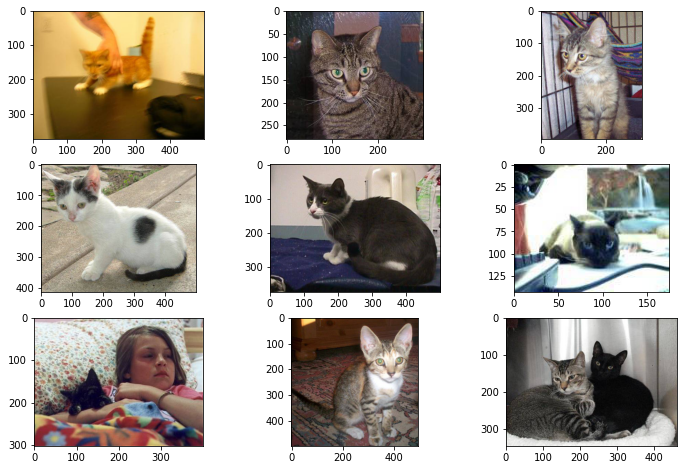

In [ ]:
# Visualizando algumas imagens da base de treino
folder = 'train/cat/'

plt.figure(figsize=(12,8))
# Plotando as 9 primeiras imagens da base
for i in range(9):
	plt.subplot(330 + 1 + i)
 
	# Definindo o nome do arquivo
	filename = folder + str(i) + '.jpg'
	image = imread(filename)
 
	# Plotando a imagem
	plt.imshow(image)

# Visualizando as imagens
plt.show()

Agora que os dados foram baixados e armazenados em seus respectivos diretórios, e as bibliotecas importadas, é hora de preparar os dados para que o modelo de Machine Learning possa realizar as previsões.

## Preparação dos Dados

Uma imagem é representada por pixels, que são células individuais que formam uma matriz numérica. É por conta dessa pixelagem de imagens que o computador é capaz de interpretá-las como é possível ver no exemplo abaixo:

<center><img alt='Computer Vision' src=https://ai.stanford.edu/~syyeung/cvweb/Pictures1/imagematrix.png></center>

Uma imagem pode gerar dois tipos de matrizes numéricas, que são:

* Imagens nas cores preto e branco são interpretadas como uma matriz 2D, onde cada pixel possui um valor entre 0 e 255, sendo que o valor 0 refere-se a cor totalmente preta, 255 totalmente branca e entre esses dois valores existe uma escala da cor cinza.

* Para as imagens a cores essa matriz passa a ser 3D para as cores Azul, Verde e Vermelho, ambas com valores próprios entre 0 e 255, enquanto que as outras cores são combinações dessas três. 

Mesmo que a imagem por si só possa ser interpretada por um modelo, ela ainda precisa passar por algumas etapas preparatórias para que esse modelo consiga obter boas previsões.

Essas preparações são padronizar o tamanho das imagens, já que imagens com diferentes proporções vão impactar bastante o desempenho do modelo, informar o tipo de cores (2D ou 3D) e sua paleta de cores (0 a 255):


In [ ]:
# Padronizando o tamanho das imagens, informando o tipo da imagem e definindo a paleta de cores
largura_imagem = 160
altura_imagem = 160
tamanho_imagem = (largura_imagem, altura_imagem)

canal_cores_imagem = 3 # 3D por serem imagens coloridas
paleta_cores_imagem = 255 # as cores terão valores entre 0 e 255

formato_imagem = tamanho_imagem + (canal_cores_imagem,)

Além da padronização das imagens, é preciso criar uma base de dados para o treinamento do modelo, que até agora as imagens foram apenas movidas para seus respectivos diretórios, e para isso o TensorFlow possui o módulo utilitário `image_dataset_from_directory` que gera essa base.

Como boa prática, será separado 20% da base de treino para ser utilizada como validação do modelo.

In [ ]:
# Criando a base de dados de treino (aplicando a padronização definida acima)
dataset_treino = tf.keras.preprocessing.image_dataset_from_directory(dir_treino,
                                                                     validation_split = 0.2,
                                                                     subset = 'training',
                                                                     seed = 254,
                                                                     image_size = tamanho_imagem,
                                                                     batch_size = 32, # quantidade de features
                                                                     shuffle = True)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [ ]:
# Criando a base de dados de validação para o treinamento
dataset_validacao = tf.keras.preprocessing.image_dataset_from_directory(dir_treino,
                                                                        validation_split = 0.2,
                                                                        subset = 'validation',
                                                                        seed = 254,
                                                                        image_size = tamanho_imagem,
                                                                        batch_size = 32, # quantidade de features
                                                                        shuffle = True)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [ ]:
# Checando as classes
nomes_classes = dataset_treino.class_names
print(nomes_classes)

['cat', 'dog']


Agora que temos as bases de treinamento e validação geradas, vamos observar as primeiras imagens para o treinamento:

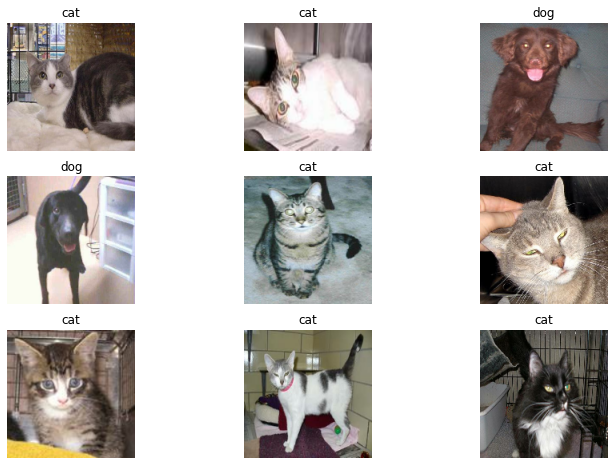

In [ ]:
# Visualizando as primeiras 9 imagens da base de treino
plt.figure(figsize=(12, 8))
for images, labels in dataset_treino.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(nomes_classes[labels[i]])
    plt.axis("off")

Além da preparação de dados acima, outra etapa que também seria fundamental em Machine Learning para se obter bons modelos, seria é a etapa de Feature Engineering, porém uma boa notícia é que algoritmos de redes neurais convolucionais funcionam exatamente através da extração de Features, ou seja, as Features não são treinadas, elas são aprendidas durante o treinamento do modelo com as imagens, fato esse que torna os modelos de Deep Learning (Aprendizado Profundo) extremamente precisos para tarefas de visão computacional. Dessa forma não há necessidade de passar pela etapa de extração de Features manualmente como em outras modelagens.

## Modelo Base

Para saber se um modelo é bom ou ruim, primeiro é necessário ter uma versão básica dele, ou seja, um modelo simples que será usado para comparar com o desempenho de outros modelos mais complexos, sendo assim possível visualizar se o modelo final é superior ou se a complexidade não trouxe ganhos notáveis que justifiquem sua escolha.

Um modelo sequencial utiliza três blocos de convolução com uma camada de agrupamento máximo em cada um deles e uma camada totalmente conectada que é ativada por uma função de ativação.

É importante se atentar ao fato de que temos valores entre 0 e 255 na paleta de cores das imagens, e em geral, é sempre bom buscar manter os valores numéricos baixos, o que é conhecido como realizar uma **padronização dos dados numéricos**.

Como o objetivo é ter primeiro um modelo "mais simples", não será realizado essa padronização agora:

In [ ]:
# Informando o número de classes
num_classes = 2

# Instanciando o modelo
modelo_basico = tf.keras.Sequential([tf.keras.layers.Conv2D(32, 3, activation='relu'),
                                     tf.keras.layers.MaxPooling2D(),
                                     tf.keras.layers.Conv2D(32, 3, activation='relu'),
                                     tf.keras.layers.MaxPooling2D(),
                                     tf.keras.layers.Conv2D(32, 3, activation='relu'),
                                     tf.keras.layers.MaxPooling2D(),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
# Compilando o modelo
modelo_basico.compile(optimizer='adam',
                      loss=tf.keras.losses.BinaryCrossentropy(),
                      metrics=['accuracy'])

In [ ]:
# Treinando e Validando o modelo
modelo_basico.fit(dataset_treino,
                  validation_data = dataset_validacao,
                  epochs = 6)

Epoch 1/6
625/625 [==============================] - 751s 1s/step - loss: 0.9818 - accuracy: 0.5376 - val_loss: 0.6872 - val_accuracy: 0.5550
Epoch 2/6
625/625 [==============================] - 748s 1s/step - loss: 0.6848 - accuracy: 0.5428 - val_loss: 0.6955 - val_accuracy: 0.5518
Epoch 3/6
625/625 [==============================] - 728s 1s/step - loss: 0.6785 - accuracy: 0.5599 - val_loss: 0.6934 - val_accuracy: 0.5596
Epoch 4/6
625/625 [==============================] - 725s 1s/step - loss: 0.6730 - accuracy: 0.5684 - val_loss: 0.7108 - val_accuracy: 0.5520
Epoch 5/6
625/625 [==============================] - 730s 1s/step - loss: 0.6669 - accuracy: 0.5793 - val_loss: 0.6875 - val_accuracy: 0.5718
Epoch 6/6
625/625 [==============================] - 729s 1s/step - loss: 0.6575 - accuracy: 0.5884 - val_loss: 0.6891 - val_accuracy: 0.5516


In [ ]:
# Resumo do modelo
modelo_basico.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 158, 158, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 79, 79, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 77, 77, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 38, 38, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 36, 36, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 18, 18, 32)      

Agora vamos adicionar uma camada de padronização ao modelo e ver se há uma melhora de desempenho:

In [ ]:
# Adicionando uma camada de padronização (Rescaling)
modelo_base = tf.keras.Sequential([tf.keras.layers.Rescaling(1./255),
                                  tf.keras.layers.Conv2D(32, 3, activation='relu'),
                                  tf.keras.layers.MaxPooling2D(),
                                  tf.keras.layers.Conv2D(32, 3, activation='relu'),
                                  tf.keras.layers.MaxPooling2D(),
                                  tf.keras.layers.Conv2D(32, 3, activation='relu'),
                                  tf.keras.layers.MaxPooling2D(),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
# Compilando o modelo
modelo_base.compile(optimizer='adam',
                    loss=tf.keras.losses.BinaryCrossentropy(),
                    metrics=['accuracy'])

In [ ]:
# Treinando e Validando o modelo base padronizado
modelo_base_historico = modelo_base.fit(dataset_treino,
                                        validation_data = dataset_validacao,
                                        epochs = 6)

Epoch 1/6
625/625 [==============================] - 718s 1s/step - loss: 0.6107 - accuracy: 0.6589 - val_loss: 0.5598 - val_accuracy: 0.7154
Epoch 2/6
625/625 [==============================] - 720s 1s/step - loss: 0.4900 - accuracy: 0.7655 - val_loss: 0.4800 - val_accuracy: 0.7678
Epoch 3/6
625/625 [==============================] - 720s 1s/step - loss: 0.4278 - accuracy: 0.8036 - val_loss: 0.4395 - val_accuracy: 0.8022
Epoch 4/6
625/625 [==============================] - 729s 1s/step - loss: 0.3811 - accuracy: 0.8291 - val_loss: 0.4422 - val_accuracy: 0.7936
Epoch 5/6
625/625 [==============================] - 740s 1s/step - loss: 0.3469 - accuracy: 0.8476 - val_loss: 0.4061 - val_accuracy: 0.8224
Epoch 6/6
625/625 [==============================] - 743s 1s/step - loss: 0.3174 - accuracy: 0.8647 - val_loss: 0.4007 - val_accuracy: 0.8290


Só pela padronização inserida na entrada da rede neural o modelo base conseguiu uma melhora de aproximadamente ~27% em sua Acurácia, provando a importância dessa etapa.

Existem outras formas de melhorar o modelo base, que são as técnicas de Aumento de Dados (Data Augmentation) e Transferência de Aprendizado (Transfer Learning).

## Aumento de Dados (Data Augmentation)

Essa técnica consiste em aumentar diversidade do conjunto de treinamento com algumas transformações nas imagens como:

* Rotação (Rotation);

* Mudança de eixo vertical ou horizontal (Flip);

* Centralização (Crop);

* Mudança de contraste (Contrast);

* Mudança de zoom (Zoom);

* Escala de cinza (Gray Scale);

* Saturação (Saturation);

* Mudança de brilho (Brightness);

* Entre outros.

Além de melhorar o desempenho em geral do modelo de rede neural, essa técnica também reduz o overfitting por generalizar mais a base de dados.

Vamos aplicar algumas dessas transformações em algumas imagens e ver como funciona:

In [ ]:
# Modelo sequencial de transformadores (Flip, Rotation, Zoom e Contrast)
data_augmentation = tf.keras.models.Sequential([tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
                                                tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
                                                tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
                                                tf.keras.layers.experimental.preprocessing.RandomContrast(0.2)])

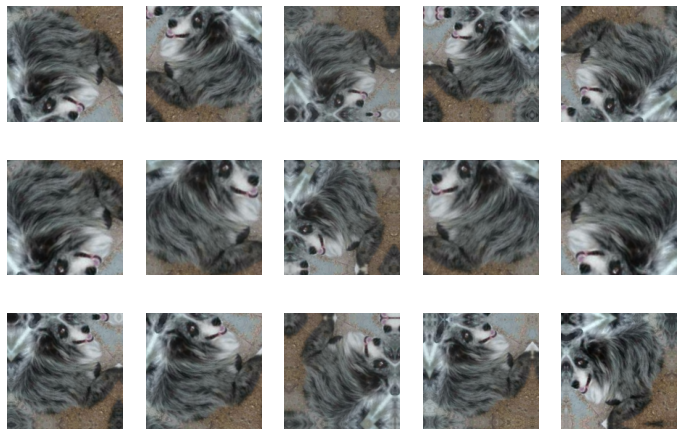

In [ ]:
# Aplicando a técnica de Aumento de Dados e plotando o resultado
plt.figure(figsize = (12, 8))

tf.get_logger().setLevel('ERROR') # Removendo as strings de Warnings do TensorFlow em relação ao Loop

for features, _ in dataset_treino.take(1): # pegar a primeira imagem
    
  feature = features[0]

  for i in range(15): # plotando as transformações da imagem selecionada

    feature_data_augmentation = data_augmentation(tf.expand_dims(feature, 0))

    plt.subplot(3, 5, i + 1)
    plt.axis('off')

    plt.imshow(feature_data_augmentation[0] / paleta_cores_imagem)

Agora que temos uma camada de transformações, vamos adicioná-la em uma nova modelagem e comparar os resultados com o desempenho do modelo básico que foi treinado anteriormente:

In [ ]:
# Instanciando a nova modelagem (com Aumento de Dados)
modelo_aumentado = tf.keras.Sequential([tf.keras.layers.Rescaling(1./255),
                                        data_augmentation,
                                        tf.keras.layers.Conv2D(32, 3, activation='relu'),
                                        tf.keras.layers.MaxPooling2D(),
                                        tf.keras.layers.Conv2D(32, 3, activation='relu'),
                                        tf.keras.layers.MaxPooling2D(),
                                        tf.keras.layers.Conv2D(32, 3, activation='relu'),
                                        tf.keras.layers.MaxPooling2D(),
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
# Compilando o modelo
modelo_aumentado.compile(optimizer='adam',
                         loss=tf.keras.losses.BinaryCrossentropy(),
                         metrics=['accuracy'])

In [ ]:
# Treinando e Validando o novo modelo
modelo_aumentado_historico = modelo_aumentado.fit(dataset_treino,
                                                  validation_data = dataset_validacao,
                                                  epochs = 6)

Epoch 1/6
625/625 [==============================] - 804s 1s/step - loss: 0.6605 - accuracy: 0.5901 - val_loss: 0.6113 - val_accuracy: 0.6720
Epoch 2/6
625/625 [==============================] - 799s 1s/step - loss: 0.6145 - accuracy: 0.6618 - val_loss: 0.5912 - val_accuracy: 0.6810
Epoch 3/6
625/625 [==============================] - 799s 1s/step - loss: 0.5928 - accuracy: 0.6850 - val_loss: 0.5705 - val_accuracy: 0.7016
Epoch 4/6
625/625 [==============================] - 800s 1s/step - loss: 0.5692 - accuracy: 0.7026 - val_loss: 0.5187 - val_accuracy: 0.7420
Epoch 5/6
625/625 [==============================] - 807s 1s/step - loss: 0.5583 - accuracy: 0.7102 - val_loss: 0.5299 - val_accuracy: 0.7410
Epoch 6/6
625/625 [==============================] - 804s 1s/step - loss: 0.5454 - accuracy: 0.7204 - val_loss: 0.5095 - val_accuracy: 0.7570


Embora o modelo padronizado e com aumento de dados tenha obtido acurácias inferiores ao do modelo base em seis épocas, somente comparando as perdas dos modelos é possível identificar qual foi melhor.  

Para essa comparação, vamos criar uma função para plotar os gráficos das acurácias e das perdas dos modelos:

In [ ]:
# Criando função para plotar os gráficos de desempenho do modelo
def plot_modelo(modelo):

    epochs = 6
    accuracy = modelo.history['accuracy']
    val_accuracy = modelo.history['val_accuracy']

    loss = modelo.history['loss']
    val_loss = modelo.history['val_loss']

    epochs_range = range(epochs)

    plt.gcf().clear()
    plt.figure(figsize = (15, 8))

    plt.subplot(1, 2, 1)
    plt.title('Acurácia Treinamento e Validação')
    plt.plot(epochs_range, accuracy, label = 'Acurácia Treinamento')
    plt.plot(epochs_range, val_accuracy, label = 'Acurácia Validação')
    plt.legend(loc = 'lower right')

    plt.subplot(1, 2, 2)
    plt.title('Perda Treinamento e Validação')
    plt.plot(epochs_range, loss, label = 'Perda Treinamento')
    plt.plot(epochs_range, val_loss, label = 'Perda Validação')
    plt.legend(loc = 'lower right')

    plt.show()

Com a função acima vamos comparar os desempenhos dos modelos.

<Figure size 432x288 with 0 Axes>

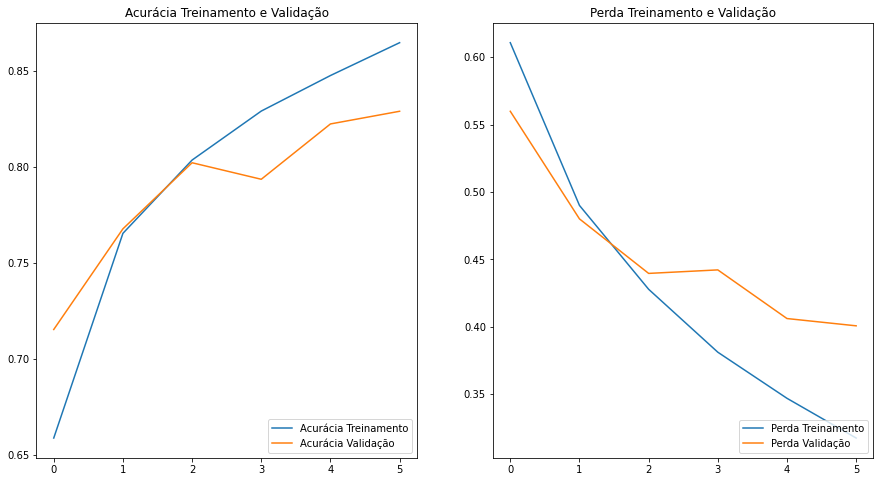

In [ ]:
# Plotando o desempenho do modelo Base Padronizado
plot_modelo(modelo_base_historico)

<Figure size 432x288 with 0 Axes>

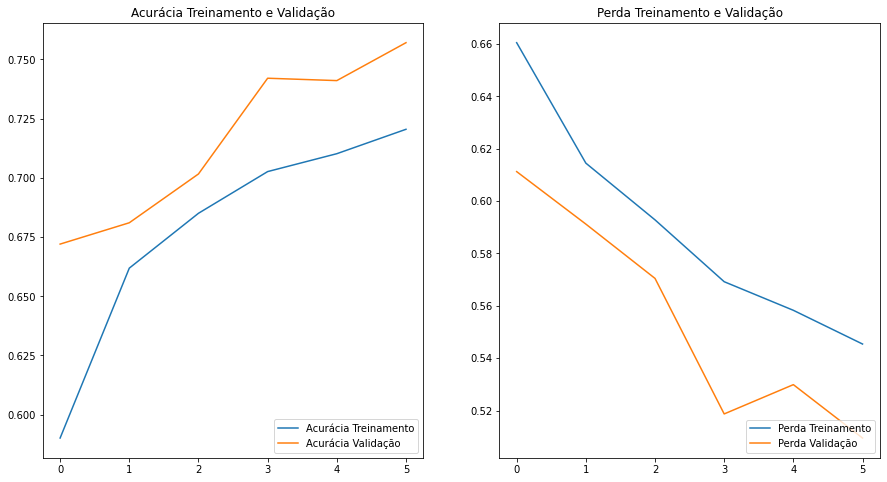

In [ ]:
# Plotando o desempenho do modelo Padronizado e com Aumento de Dados
plot_modelo(modelo_aumentado_historico)

Os gráficos acima são bons para nos dizer se nossos modelos sofrem de overfitting ou underfitting.

Overfitting: 

* A curva de aprendizado durante o treinamento começa com uma perda bastante baixa e vai aumentando ao adicionar mais exemplos e não achata a curva;

* Já a curva de aprendizado durante a validação possui uma alta perda no início e vai diminuindo com a adição de novos exemplos, além disso a curva também não se achata;

* Ambas as curvas de aprendizado são distantes uma da outra.

Observando nossos gráficos, nenhum dos modelos treinados segue essas características de overfitting, então vamos checar se enquadram no cenário de underfitting.

Underfitting:

* A curva de aprendizado durante o treinamento começa com uma perda baixa e aumenta com a adição de novos exemplos, pode ocorrer também um súbito achatamento da curva;

* Já a curva de aprendizado durante a validação começa com uma perda alta e diminui gradualmente com a adição de novos exemplos, neste caso também pode ocorrer um súbito achatamento da curva. 

Pelas informações acima podemos dizer que nossos modelos também não se enquadram ao caso do underfitting.

Embora o modelo base não tenha características marcantes de overfitting pelo gráfico de perda, pela sua acurácia temos traços desse fenômeno, onde seu desempenho durante o treinamento foi superior ao da validação. Quando treinamos um novo modelo com a técnica de aumento de dados essa característica some, onde agora temos um desempenho de validação bem superior ao de treinamento, o que mostra que essa técnica de aumento de dados realmente auxilia na redução de overfitting.

## Transferência de Aprendizagem (Transfer Learning)

Transferência de aprendizado nada mais é que aproveitar um modelo pré-treinado em um grande conjunto de dados, normalmente esse modelo é treinado para uma tarefa de classificação de imagem em grande escala.

Esse modelo pré-treinado pode ser usado da mesma forma que está ou pode ser usado como incremento no nosso próprio modelo, o que caracteriza a transferência de aprendizado.

De acordo com a própria documentação sobre a transferência de aprendizado no [TensorFlow](https://www.tensorflow.org/tutorials/images/transfer_learning):

"*A intuição por trás do aprendizado de transferência para classificação de imagens é que, se um modelo for treinado em um conjunto de dados grande e geral o suficiente, esse modelo servirá efetivamente como um modelo genérico do mundo visual. Você pode aproveitar esses mapas de recursos aprendidos sem precisar começar do zero treinando um modelo grande em um grande conjunto de dados.*"

O modelo que usaremos nessa transferência de aprendizado se chama MobileNet V2, desenvolvido pela Google e treinado no conjunto de dados ImageNet, que consiste em 1,4 milhão de imagens e mil classes.

Vamos instanciar o modelo MobileNet V2 pré-carregado com os pesos treinados no ImageNet e especificar o parâmetro `include_top` como `False`, assim o modelo instanciado não irá carregar as camadas de classificação na parte superior, o que é ideal para a extração de features. 

In [ ]:
# Instanciando o modelo MobileNet V2
modelo_mobilenet = tf.keras.applications.MobileNetV2(input_shape = formato_imagem,
                                                     include_top = False,
                                                     weights = 'imagenet')

9406464/9406464 [==============================] - 0s 0us/step


Como o modelo MobileNet V2 possui muitas camadas, é importante congelar a base convolucional antes de compilar e treinar o modelo, pois isso evita que os pesos em uma determinada camada sejam atualizados durante o treinamento e destruam tudo que o modelo aprendeu.

In [ ]:
# Congelando os pesos das camadas
modelo_mobilenet.trainable = False

In [ ]:
# Checando o resumo do modelo
modelo_mobilenet.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

Agora que temos nosso modelo pré-treinado instanciado, vamos acrescentá-lo ao nosso modelo:

In [ ]:
# Instanciando o novo modelo com todas as etapas anteriores
modelo_final = tf.keras.Sequential([tf.keras.layers.Rescaling(1./255),
                                    data_augmentation,
                                    modelo_mobilenet,
                                    tf.keras.layers.GlobalAveragePooling2D(),
                                    tf.keras.layers.Dropout(0.2), # dropout também ajuda a reduzir o overfitting
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')])

In [ ]:
# Compilando o modelo
modelo_final.compile(optimizer='adam',
                    loss=tf.keras.losses.BinaryCrossentropy(),
                    metrics=['accuracy'])

In [ ]:
# Treinando e Validando o novo modelo
modelo_final_historico = modelo_final.fit(dataset_treino,
                                          validation_data = dataset_validacao,
                                          epochs = 6)

Epoch 1/6
625/625 [==============================] - 547s 861ms/step - loss: 0.3256 - accuracy: 0.8508 - val_loss: 0.0943 - val_accuracy: 0.9672
Epoch 2/6
625/625 [==============================] - 517s 827ms/step - loss: 0.2605 - accuracy: 0.8852 - val_loss: 0.0891 - val_accuracy: 0.9680
Epoch 3/6
625/625 [==============================] - 523s 836ms/step - loss: 0.2587 - accuracy: 0.8905 - val_loss: 0.0961 - val_accuracy: 0.9640
Epoch 4/6
625/625 [==============================] - 528s 844ms/step - loss: 0.2546 - accuracy: 0.8921 - val_loss: 0.0852 - val_accuracy: 0.9682
Epoch 5/6
625/625 [==============================] - 528s 845ms/step - loss: 0.2512 - accuracy: 0.8931 - val_loss: 0.0919 - val_accuracy: 0.9690
Epoch 6/6
625/625 [==============================] - 525s 841ms/step - loss: 0.2507 - accuracy: 0.8939 - val_loss: 0.0832 - val_accuracy: 0.9720


<Figure size 432x288 with 0 Axes>

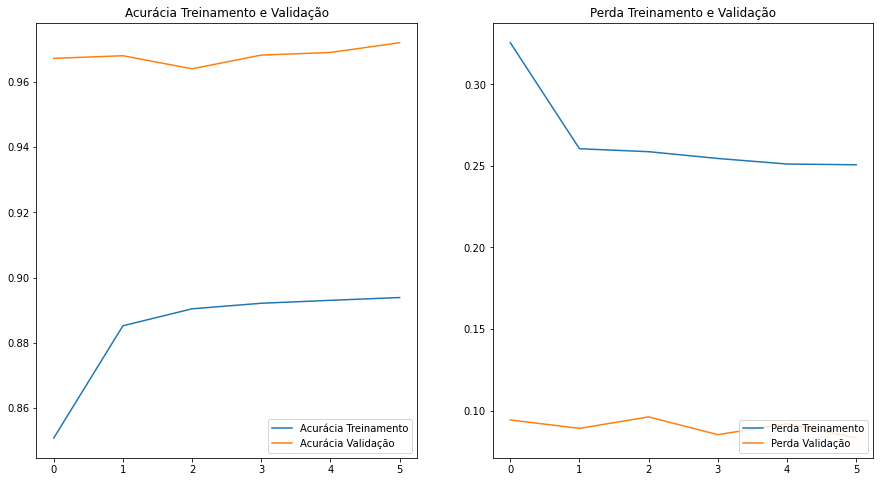

In [ ]:
# Plotando o desempenho do modelo final
plot_modelo(modelo_final_historico)

Pelo gráfico acima vemos o quanto a transferência de aprendizado melhorou o desempenho do nosso modelo.

Antes os resultados eram:

* Acurácia Treino: 72%
* Perda Treino: 0.54

* Acurácia Validação: 75%
* Perda Validação: 0.51

Agora temos:

* Acurácia Treino: 89%
* Perda Treino: 0.25

* Acurácia Validação: 97%
* Perda Validação: 0.08

Além da melhora nessas métricas, vamos rever o gráfico da curva de aprendizado do antigo modelo e comparar com o do novo:

<Figure size 432x288 with 0 Axes>

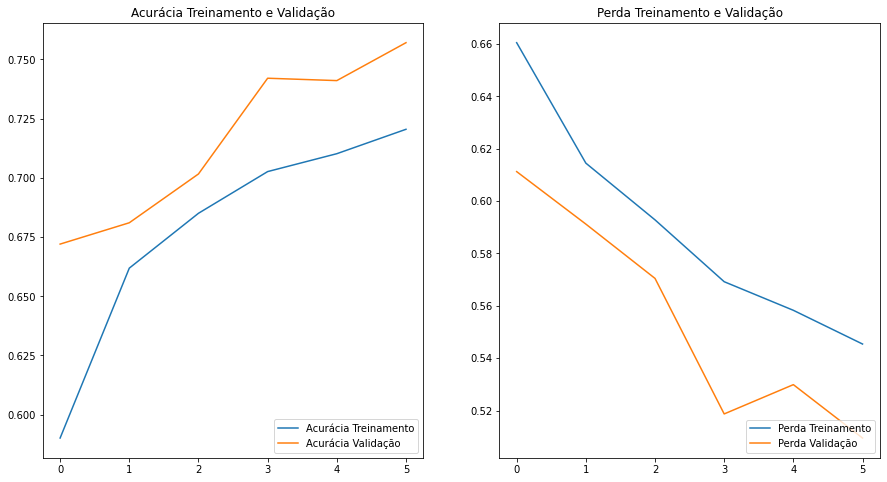

In [ ]:
# Plotando o desempenho do modelo Padronizado e com Aumento de Dados
plot_modelo(modelo_aumentado_historico)

Enquanto temos uma curva de perda decrescente, podemos dizer que o modelo ainda está aprendendo, ou seja, o modelo anterior ainda estava aprendendo novas Features em 6 épocas, onde é possível ver no gráfico acima que a curva continua descendo sem achatar. Agora quando olhamos para o gráfico de perda do modelo novo que passou pela transferência de aprendizado, a curva se achata logo na segunda época e não sofre mais variações expressivas, apresentando caimento bem leve.

Isso quer dizer que com a transferência de aprendizagem o modelo aprendeu praticamente tudo que podia com os dados passados logo na segunda época, sendo assim não mais necessário treinar mais épocas já que a melhora no desempenho será bem baixa, como vemos através dos resultados obtidos:

Época 1 (segunda época de treino):

* Acurácia Treino e Validação: 88.5% e 96.8%

* Perdas Treino e Validação: 0.260 e 0.089

Época 5 (sexta época de treino):

* Acurácia Treino e Validação: 89.39% e 97.20%

* Perdas Treino e Validação: 0.250 e 0.083

Em resumo os ganhos do modelo entre a segunda época de treinamento e a sexta época foram de:

* Acurácia Treino e Validação: 0.89% e 0.4%

* Perdas Treino e Validação: 0.01 e 0.006

Além da transferência de aprendizado oferecer mais features para o modelo aprender, ela também reduz consideravelmente o tempo de treinamento de uma rede neural, como foi o nosso caso, onde o modelo sem tranferência levou quase 1:30h pra obter acurácia de 75% na validação e o modelo com transferência obteve acurácia de aproximadamente 97% na validação em cerca de 18 minutos. 

Em ambos ainda há possibilidades de melhorias:

* Modelo sem transferência: esse modelo possui uma curva de aprendizado decrescente após a sexta época, ou seja, caso fossem treinadas mais épocas esse modelo poderia obter resultados até semelhantes ao do modelo com transferência, ao custo claro de bem mais tempo e consequentemente poder computacional. Além disso poderia ser aplicado a **técnica de otimização dos hiperparâmetros** da rede como alterar o parâmetro `learning_rate`, por exemplo.

* Modelo com transferência: mais épocas poderiam ser treinadas a fim de aumentar ainda mais o desempenho, tendo cuidado com o overfitting, e além de também poder ser aplicada a técnica de otimização dos hiperparâmetros da rede, podemos aplicar a [técnica de Ajuste Fino](https://www.tensorflow.org/tutorials/images/transfer_learning#fine_tuning) que em resumo é um ajuste dos pesos das camadas superiores (camadas mais especializadas) da rede neural.

Agora que temos o modelo treinado e validado vamos testá-lo com o conjunto de imagens de teste.

In [ ]:
# Salvando o modelo final
modelo_final.save_weights('modelo_final_cat_dog')
modelo_final.save('modelo_final_cat_dog')

## Importando o modelo treinado e validando com o conjunto de Teste

Com o modelo treinado e salvo, vamos importá-lo novamente e então classificar as imagens do conjunto de teste.

In [ ]:
# Carregando modelo
modelo = tf.keras.models.load_model('modelo_final_cat_dog')

In [ ]:
# Criando uma função para testar e predizer uma imagem de cachorro ou gato através do carregamento dessa imagem
def prever(image_file):

    image = tf.keras.preprocessing.image.load_img(image_file, target_size = tamanho_imagem)
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = tf.expand_dims(image, 0)

    previsao = modelo.predict(image)[0][0]

    print('Previsão: {0} | {1}'.format(previsao, ('cat' if previsao < 0.5 else 'dog')))

Prevendo uma imagem de cachorro:

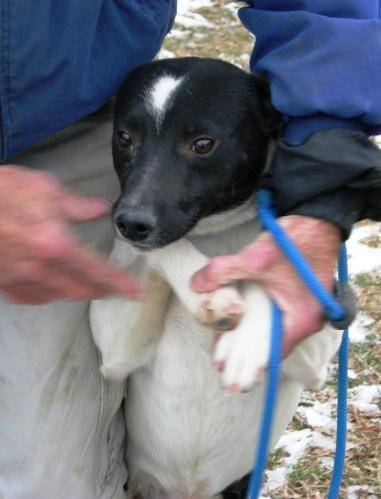

In [ ]:
# Visualizando a imagem
display(Image(filename = dir_teste + '/1.jpg'))

In [ ]:
# Executando a função para prever se a imagem é um cachorro ou gato
prever('1.jpg')

1/1 [==============================] - 0s 75ms/step
Previsão: 0.9966415762901306 | dog


Prevendo uma imagem de gato:

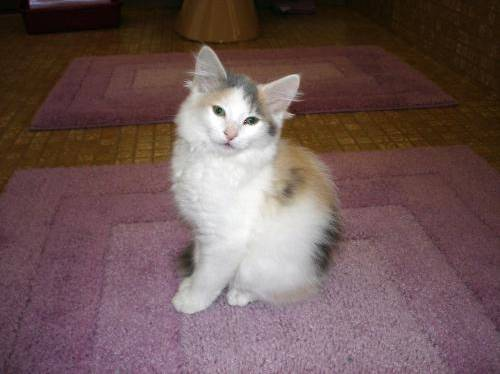

In [ ]:
# Visualizando a imagem
display(Image(filename = dir_teste + '/10.jpg'))

In [ ]:
# Executando a função de classificar a imagem
prever('10.jpg')

1/1 [==============================] - 0s 78ms/step
Previsão: 0.004702476784586906 | cat


Vemos que nosso modelo classificou corretamente as duas fotos que fazem parte do conjunto de teste, agora vamos realizar a previsão em todo o conjunto:

In [ ]:
# Criando uma função para testar e predizer uma imagem de cachorro ou gato através do carregamento dessa imagem
def classificar_imagem(image_file):

    image = tf.keras.preprocessing.image.load_img(image_file, target_size = tamanho_imagem)
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = tf.expand_dims(image, 0)

    previsao = modelo.predict(image)[0][0]
    label = ('cat' if previsao < 0.5 else 'dog')

    return previsao, label

Antes utilizar o modelo para classificar todas as imagens do conjunto, precisamos criar um objeto com a lista das imagens do diretório de teste que separamos no início do projeto:

In [ ]:
# Criando a base de dados de validação para o treinamento
dataset_teste = os.listdir(dir_teste)

In [ ]:
# Criando um DataFrame com os IDs das imagens
ids = [int(x.split('.')[0]) for x in dataset_teste]
previsoes_df = pd.DataFrame({'ID': ids})

# Visualizando o DataFrame
previsoes_df

<IPython.core.display.Javascript object>

,ID
0,4429
1,7635
2,12437
3,8520
4,5831
...,...
12495,9604
12496,1084
12497,6629
12498,7887


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Criando um loop para prever cada imagem no conjunto de teste
lista_valor_previsao = [] 
lista_label_previsao = []

# Loop para classificar todas as imagens do conjunto de teste
for i in dataset_teste:
  
  # Executando a função 
  valor_previsao, label_previsao =  classificar_imagem(dir_teste + '/' + i)

  # Adicionando os resultados às devidas listas
  lista_valor_previsao.append(valor_previsao)
  lista_label_previsao.append(label_previsao)

In [ ]:
# Adicionando as informações no DataFrame
previsoes_df['Valor Previsão'] = lista_valor_previsao
previsoes_df['Label'] = lista_label_previsao

# Visualizando o DataFrame
previsoes_df

,ID,Valor Previsão,Label
0,4429,0.992086,dog
1,7635,0.731718,dog
2,12437,0.984371,dog
3,8520,0.001452,cat
4,5831,0.983524,dog
...,...,...,...
12495,9604,0.984809,dog
12496,1084,0.000105,cat
12497,6629,0.974148,dog
12498,7887,0.999361,dog


Agora que temos o valor da previsão, quanto mais próximo o valor for de 1 maior a probabilidade de ser um cachorro e quanto mais próximo de 0 maior a probabilidade de ser gato.

Vamos observar algumas das imagens com probabilidades próximas do valor 0.5: 

In [ ]:
# Obtendo os IDs das previsões próximas ao valor de previsão 0.5
previsoes_incertas = previsoes_df[['ID','Valor Previsão','Label']].loc[(previsoes_df['Valor Previsão'] >= 0.495) & (previsoes_df['Valor Previsão'] <= 0.504)]

# Checando a quantidade de imagens entre os valores de previsão 0.495 e 0.504
len(previsoes_incertas)

4

In [ ]:
# Checando os IDs
previsoes_incertas['ID'].to_list()

[11127, 4673, 7706, 9509]

Imagem ID 11127:

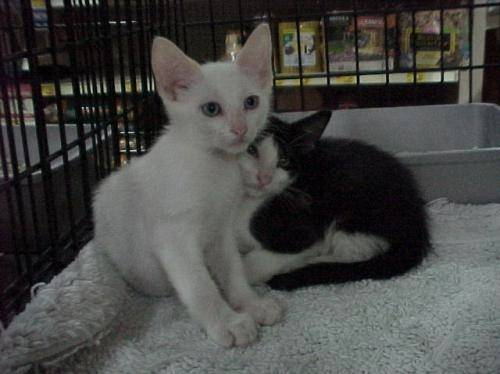

In [ ]:
# Visualizando as imagens
display(Image(filename = dir_teste + '/11127.jpg'))

In [ ]:
# Checando a classificação do modelo
previsoes_incertas[['Valor Previsão', 'Label']].loc[previsoes_incertas['ID'] == 11127]

,Valor Previsão,Label
8755,0.49561,cat


Imagem ID 4673:

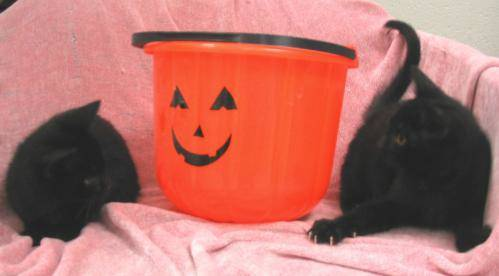

In [ ]:
# Visualizando as imagens
display(Image(filename = dir_teste + '/4673.jpg'))

In [ ]:
# Checando a classificação do modelo
previsoes_incertas[['Valor Previsão', 'Label']].loc[previsoes_incertas['ID'] == 4673]

,Valor Previsão,Label
8826,0.496602,cat


Imagem ID 7706:

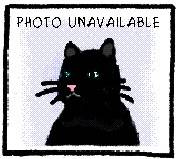

In [ ]:
# Visualizando as imagens
display(Image(filename = dir_teste + '/7706.jpg'))

In [ ]:
# Checando a classificação do modelo
previsoes_incertas[['Valor Previsão', 'Label']].loc[previsoes_incertas['ID'] == 7706]

,Valor Previsão,Label
10342,0.500346,dog


Imagem ID 9509:

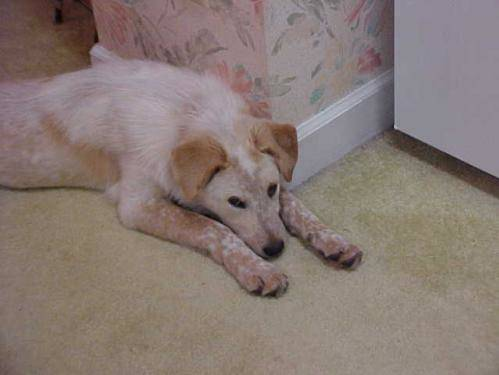

In [ ]:
# Visualizando as imagens
display(Image(filename = dir_teste + '/9509.jpg'))

In [ ]:
# Checando a classificação do modelo
previsoes_incertas[['Valor Previsão', 'Label']].loc[previsoes_incertas['ID'] == 9509]

,Valor Previsão,Label
11247,0.495825,cat


# Conclusão

Neste projeto vimos como aplicar Machine Learning para classificar imagens entre gatos e cachorros, passando pelas etapas de preparação e aumento de dados, como também apresentando a técnica de transferência de aprendizado que melhorou bastante o desempenho do modelo final mesmo sem passar por ajustes finos.

Conseguimos perceber que mesmo uma máquina é capaz de aprender a identificar formas, objetos e até mesmo seres vivos de forma bastante precisa se treinada adequadamente.

Embora os resultados tenham sido bons com a transferência de aprendizado, mesmo que custe várias épocas ou ajustemos os pesos das camadas mais especializadas (superiores) ainda é possível melhorar o desempenho da rede neural até o ponto de Overfitting.

É importante lembrar que existem outras técnicas de preparação de dados e de aumento que podem melhorar a extração de Features de uma rede neural, e como essa área de Machine Learning em Visão Computacional está bastante em alta, teremos cada vez mais ferramentas, métodos, técnicas e modelos robustos.

# Referências

* https://medium.com/spidernitt/image-preprocessing-why-is-it-necessary-8895b8b08c1d

* https://medium.com/analytics-vidhya/preprocess-image-data-for-machine-learning-37df531583d8

* https://machinelearningmastery.com/best-practices-for-preparing-and-augmenting-image-data-for-convolutional-neural-networks/

* https://towardsdatascience.com/image-data-augmentation-for-deep-learning-77a87fabd2bf

* https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/

* https://medium.com/swlh/image-classification-using-machine-learning-and-deep-learning-2b18bfe4693f

* https://towardsdatascience.com/wtf-is-image-classification-8e78a8235acb

* https://machinelearningmastery.com/best-practices-for-preparing-and-augmenting-image-data-for-convolutional-neural-networks/

* https://www.tensorflow.org/tutorials/load_data/images

* https://towardsdatascience.com/how-to-reduce-the-training-time-of-your-neural-network-from-hours-to-minutes-fe7533a3eec5

* https://towardsdatascience.com/improves-cnn-performance-by-applying-data-transformation-bf86b3f4cef4

* https://towardsdatascience.com/learning-curve-to-identify-overfitting-underfitting-problems-133177f38df5